In [3]:
# %pip install prophet pandas numpy scikit-learn tensorflow matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Load and concatenate data
dfs = []
for i in range(1, 15):
    df = pd.read_csv(f'./data/PDB/[Seri 2010] 2. PDB Triwulanan Atas Dasar Harga Konstan menurut Pengeluaran, {2010 + (i-1)}.csv')
    pdb = df[df.iloc[:, 0].str.contains('8. PRODUK DOMESTIK BRUTO', na=False)].iloc[:, 5]
    cleaned_df = pd.DataFrame({
        'Tahun': [str(2010 + (i-1))],
        'PDB': [str(value) for value in pdb.values.flatten()]
    })
    dfs.append(cleaned_df)
    
print(dfs)

[  Tahun        PDB
0  2010  6864133.1,   Tahun        PDB
0  2011  7287635.3,   Tahun        PDB
0  2012  7727083.4,   Tahun        PDB
0  2013  8156497.8,   Tahun        PDB
0  2014  8564866.6,   Tahun        PDB
0  2015  8982517.1,   Tahun        PDB
0  2016  9434613.4,   Tahun        PDB
0  2017  9912928.1,   Tahun         PDB
0  2018  10425851.9,   Tahun         PDB
0  2019  10949155.4,   Tahun         PDB
0  2020  10722999.3,   Tahun         PDB
0  2021  11120059.7,   Tahun         PDB
0  2022  11710247.9,   Tahun         PDB
0  2023  12301393.6]


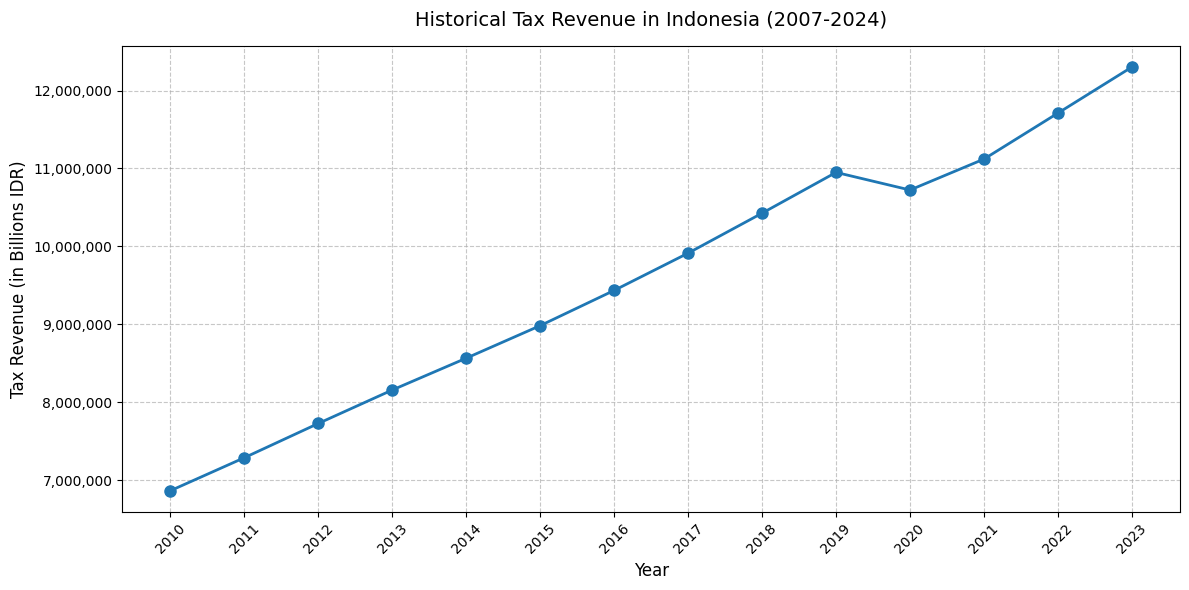

E0000 00:00:1734380228.698196    8258 cuda_blas.cc:196] failed to create cublas handle: the resource allocation failed
E0000 00:00:1734380228.698221    8258 cuda_blas.cc:199] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2024-12-17 03:17:08.698238: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INTERNAL: No blas support for stream
	 [[{{function_node __inference_one_step_on_data_4624}}{{node sequential_1_1/dense_1_1/MatMul}}]]


InternalError: Graph execution error:

Detected at node sequential_1_1/dense_1_1/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/litfan/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/litfan/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/litfan/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/litfan/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/litfan/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/litfan/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/litfan/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/litfan/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/litfan/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_8175/3835346766.py", line 46, in <module>

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 110, in one_step_on_data

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 56, in train_step

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/models/functional.py", line 182, in call

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/models/functional.py", line 632, in call

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/ops/numpy.py", line 3759, in matmul

  File "/home/litfan/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/numpy.py", line 501, in matmul

No blas support for stream
	 [[{{node sequential_1_1/dense_1_1/MatMul}}]] [Op:__inference_multi_step_on_iterator_4684]

In [4]:
data = pd.concat(dfs).reset_index(drop=True)
data['PDB'] = pd.to_numeric(data['PDB'], errors='coerce').fillna(0)

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(data['Tahun'], data['PDB'], marker='o', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Historical Tax Revenue in Indonesia (2007-2024)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tax Revenue (in Billions IDR)', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LSTM Implementation
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['PDB'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
dataset = data_scaled
train_size = int(len(dataset) * 0.67)
train, test = dataset[0:train_size], dataset[train_size:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Enhanced LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Increased epochs
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=0)

# Adjust the predictions to extend until 2031 (7 years from 2024)
future_years = [str(year) for year in range(2024, 2032)]

# LSTM Implementation
# Modified to predict 7 years ahead
lstm_future = []
last_sequence = data_scaled[-look_back:]
last_sequence = np.reshape(last_sequence, (1, look_back, 1))

for _ in range(7):  # Changed from 5 to 7 years
    next_pred = model.predict(last_sequence)
    lstm_future.append(next_pred[0,0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0,-1,0] = next_pred

lstm_future = np.array(lstm_future).reshape(-1, 1)
lstm_future = scaler.inverse_transform(lstm_future)


# Prophet Implementation
prophet_data = pd.DataFrame({
    'ds': pd.to_datetime(data['Tahun']),
    'y': data['PDB']
})

prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_data)

# Extend Prophet predictions to 2031
future_dates = prophet_model.make_future_dataframe(periods=7, freq='Y')  # Changed from 5 to 7 years
prophet_forecast = prophet_model.predict(future_dates)

# Gaussian Process Implementation
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP model
X_train = np.arange(len(data)).reshape(-1, 1)
y_train = data['PDB'].values
gp.fit(X_train, y_train)

# Extend GP predictions to 2031
X_pred = np.arange(len(data), len(data) + 7).reshape(-1, 1)  # Changed from 5 to 7 years
y_pred, sigma = gp.predict(X_pred, return_std=True)
X_pred = np.arange(len(data), len(data) + 7).reshape(-1, 1)  # Changed from 5 to 7 years
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plot predictions
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(data['Tahun'], data['PDB'], marker='o', label='Historical Data', linewidth=2, color='black', markersize=8)

# Plot predictions
future_years = [str(year) for year in range(2024, 2031)]  # Updated range

# LSTM predictions
plt.plot(future_years, lstm_future, marker='s', label='LSTM Predictions', linestyle='--', linewidth=2)

# Prophet predictions
prophet_predictions = prophet_forecast['yhat'][-7:].values  # Changed from 5 to 7 years
plt.plot(future_years, prophet_predictions, marker='^', label='Prophet Predictions', linestyle='--', linewidth=2)

# Gaussian Process predictions
plt.plot(future_years, y_pred, marker='D', label='GP Predictions', linestyle='--', linewidth=2)

# Calculate combined predictions
combined_predictions = (lstm_future.flatten() + prophet_predictions + y_pred) / 3
plt.plot(future_years, combined_predictions, marker='o', label='Combined Predictions', linestyle='-', linewidth=2, color='red')

# Formatting
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Tax Revenue: Historical Data and Predictions (2007-2031)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tax Revenue (in Billions IDR)', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the predictions
print("\nPredictions for 2024-2031:")
print("\nYear\t\tLSTM\t\tProphet\t\tGP\t\tCombined")
print("-" * 80)
for i, year in enumerate(future_years):
    print(f"{year}\t\t{lstm_future[i][0]:.2f}\t\t{prophet_predictions[i]:.2f}\t\t{y_pred[i]:.2f}\t\t{combined_predictions[i]:.2f}")